In [1]:
import cv2
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('wall_model.pt')

# Read an image using OpenCV
source = cv2.imread('house_image_2.webp')

# Run inference on the source
results = model(source)  # list of Results objects


0: 480x640 2 ceilings, 9 walls, 456.4ms
Speed: 6.9ms preprocess, 456.4ms inference, 20.1ms postprocess per image at shape (1, 3, 480, 640)


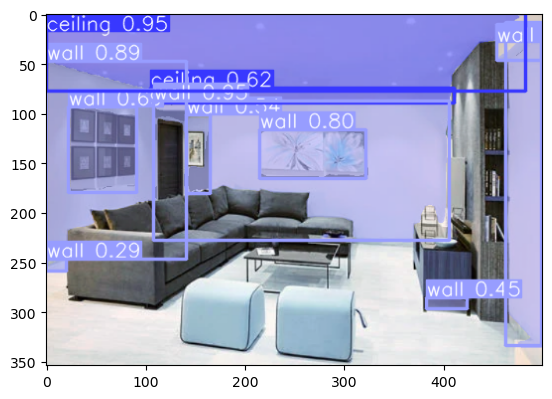

In [2]:
import matplotlib.pyplot as plt
plt.imshow(results[0].plot())

In [3]:
from ultralytics import YOLO
import cv2

# // Loading model
model = YOLO("wall_model.pt")

# // Launching segmentation task.
results = model(source="bhaumik_house.jpg")

fr = cv2.imread("bhaumik_house.jpg")
frame=cv2.cvtColor(fr, cv2.COLOR_BGR2RGB)



image 1/1 C:\Users\Atharv\bhaumik_house.jpg: 384x640 2 ceilings, 5 walls, 382.6ms
Speed: 2.0ms preprocess, 382.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
results = model(frame)


0: 384x640 2 ceilings, 2 walls, 353.1ms
Speed: 2.0ms preprocess, 353.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


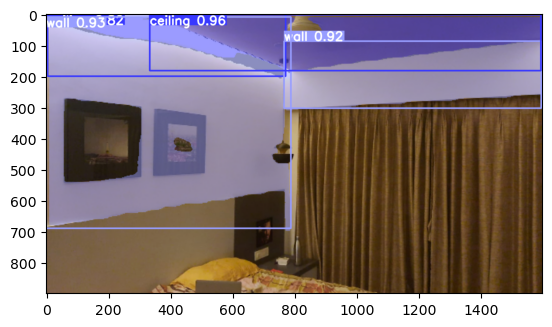

In [5]:
plt.imshow(results[0].plot())

In [6]:
import json
j1=results[0].tojson()
res=json.loads(j1)

In [7]:
walle=[]
for i in range(len(res)):
    if(res[i]['name'] == 'wall'):
        walle.append(i)

In [9]:
import numpy as np
masks = results[0].masks
if masks and len(masks):
  for j, mask in enumerate(masks):
    if(j in walle):
        xy = np.array(mask.xy, dtype=np.int32)
        cv2.fillPoly(frame, [xy], (0, 0, 100))

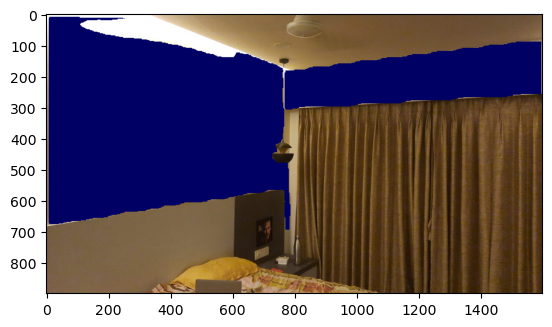

In [11]:
plt.imshow(frame)